In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
csv_path = 'data/Manaus.csv'
df = pd.read_csv(csv_path,encoding='iso-8859-1',sep=';')
print(df['_dt_notificacao'][10])

03/05/2020


In [18]:
df = df[df._classificacao.eq('Confirmado')]
print("Casos confirmados antes do Filtro: ", len(df.index)) # confirmados antes do filtro

filterList = ['_comorb', 'sintoma(s)*','_etnia','_profiss_saude','^(_dt_(\w){1,10})$','_origem', '_raca', '_criterio','_srag','_evolução','tipo_teste']
for i in range(len(filterList)):
    df = df[df.columns.drop(list(df.filter(regex=filterList[i])))]
    
print("Casos confirmados depois do Filtro: ", len(df.index)) # confirmados antes do filtro
df.dropna(inplace=True)

Casos confirmados antes do Filtro:  34948
Casos confirmados depois do Filtro:  34948


In [4]:
bairros = df['_bairro'].value_counts()[:10]
bairros.loc['OUTROS'] =  df['_bairro'].value_counts()[10:].sum()
bairros = pd.DataFrame({'bairro':bairros.index, 'casos':bairros.values})
print(bairros)

            bairro  casos
0      CIDADE NOVA    655
1           FLORES    430
2           CENTRO    411
3         COMPENSA    409
4   JORGE TEIXEIRA    404
5       PETROPOLIS    387
6      NOVO ALEIXO    376
7           TARUMA    365
8         ALVORADA    347
9          COROADO    345
10          OUTROS   8543


Text(0, 0.5, 'Número de casos')

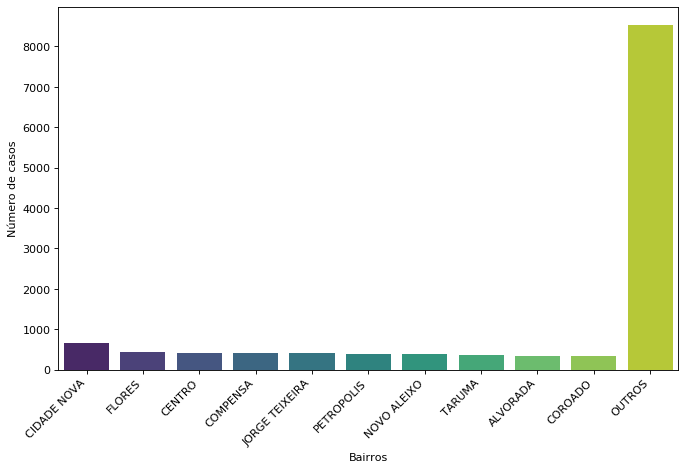

In [5]:
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x='bairro',y='casos',data=bairros,palette='viridis')
plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Bairros')
ax.set_ylabel('Número de casos')

Text(0, 0.5, 'Idade')

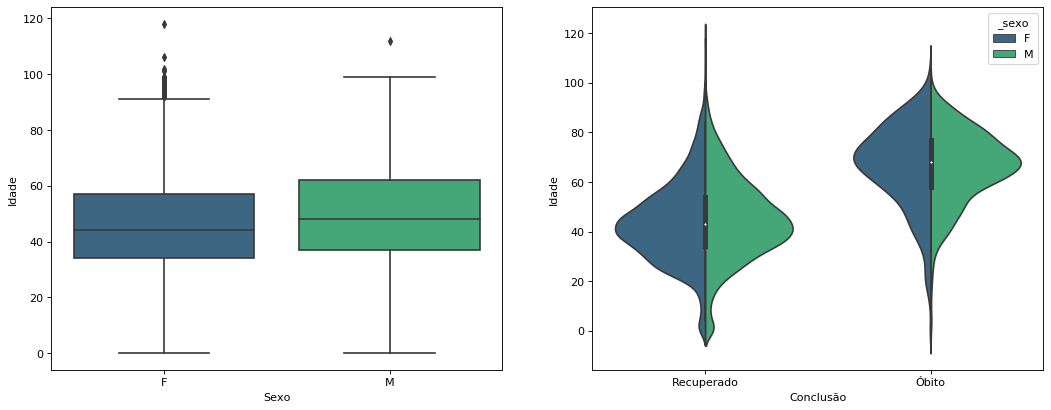

In [6]:
fig=plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
#plt.subplot(1,2,1)
ax = sns.boxplot(x='_sexo', y='_idade',data=df,palette='viridis')
ax.set_xlabel('Sexo')
ax.set_ylabel('Idade')
#plt.subplot(1,2,2)
#ax = sns.violinplot(x='_conclusao', y='_idade',hue='_sexo',data=df,palette='viridis',split=True)
#ax.set_xlabel('Conclusão')
#ax.set_ylabel('Idade')

KeyError: '_dt_notificacao'

2020-07-29    1499
2020-07-28    1300
2020-07-30    1249
2020-07-31    1176
2020-08-03    1169
2020-08-04     957
2020-08-05     870
2020-08-01     318
2020-08-02     104
2020-08-06      45
Name: _dt_notificacao, dtype: int64
DatetimeIndex(['2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03',
               '2020-08-04', '2020-08-05'],
              dtype='datetime64[ns]', freq='D')


Text(0, 0.5, 'Número de casos')

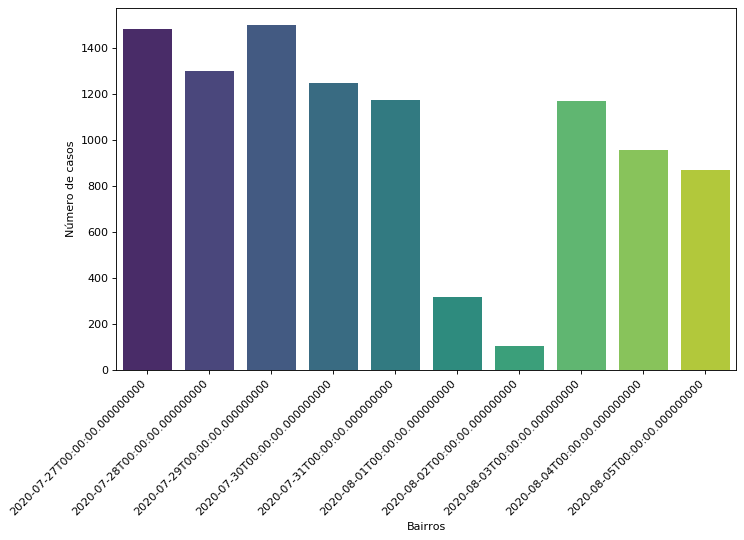

In [30]:
df['_dt_notificacao'] = pd.to_datetime(df['_dt_notificacao'],format='%d/%m/%Y')
n_dias = 10
casos_recentes = df['_dt_notificacao']  > df["_dt_notificacao"].max() - pd.Timedelta(days=n_dias)
print(df[casos_recentes]['_dt_notificacao'].value_counts())
casos = []
dti = pd.date_range(df["_dt_notificacao"].max() - pd.Timedelta(days=n_dias), periods=n_dias, freq='D')
print(dti)
for i in dti:
    aux = df['_dt_notificacao'] == i
    casos.append(len(df[aux]))
#print(casos)
##print(df[casos_recentes])
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x=dti,y=casos,palette='viridis')
plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Bairros')
ax.set_ylabel('Número de casos')

In [ ]:
casos = []
dti = pd.date_range(df["_dt_notificacao"].max() - pd.Timedelta(days=n_dias), periods=n_dias, freq='D')
print(dti)
for i in dti:
    aux = df['_dt_notificacao'] == i
    casos.append(len(df[aux]))
#print(casos)
##print(df[casos_recentes])
fig=plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.barplot(x=dti,y=casos,palette='viridis')
plt.xticks(rotation=45,ha='right')
ax.set_xlabel('Bairros')
ax.set_ylabel('Número de casos')